# EDA: Stock prices

This guided data project focus on exploratory data analysis of stock prices.
We'll focus on 7 popular bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) which occured in the early 21st century, we will focus on data from 2006 to all the way to early 2016.

## Get the Data

Here we are using [**pandas_datareader**](https://github.com/pydata/pandas-datareader) which allows you to directly read data from the source. The source here is [**yahoo finance**](https://finance.yahoo.com/) which provides, financial reports data and commentary including stock market.



In [1]:
# required dependencies.
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt
import warnings

warnings.filterwarnings("ignore")
sns.set_style('whitegrid')
%matplotlib inline

## About Data

We need to get data using pandas datareader. We will get stock information for the following banks:
* JPMorgan Chase
* Bank of America
* Wells Fargo
* Charles Schwab
* Morgan Stanley
* Goldman Sachs
* CitiGroup

Now lets get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

Reference is [HERE](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html)
    
    # Bank of America
    BAC = data.DataReader("BAC", 'yahoo', start, end)


In [2]:
start = dt.datetime(2006, 1, 1)
end = dt.datetime(2016, 1, 1)

In [3]:
# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)

# Bank of America
BAC = data.DataReader("BAC", 'yahoo', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)

# Charles Schwab (SCHW)
SCHW = data.DataReader("SCHW", 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)

# CitiGroup
C = data.DataReader("C", 'yahoo', start, end)

In [4]:
# Could also do this for a Panel Object
df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'SCHW', 'WFC'],'yahoo', start, end)

** Creating a list of the ticker symbols (as strings) in alphabetical order.**

In [5]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'SCHW', 'WFC']

** Using pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list.**

In [6]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, SCHW, WFC],axis=1,keys=tickers)

** Set the column name levels:**

In [7]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [8]:
bank_stocks

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   
...                ...        ...        ...        ...         ...   
2015-12-24   17.379999  17.219999  17.320000  17.270000  29369400.0   
2015-12-28   17.230000  16.980000  17.219999  17.129999  41777500.0   
2015-12-29   17.350000  17.160000  17.250000  17.280001  45670400.0   
2015-12-30   17.240000  17.040001  17.200001  17.049999  35066400.0   
2015-12-31   17.070000  16.830000  17.010000  16.830000  47153000.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   33.364243  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   33.009911  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   33.052406  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   33.002819  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   33.024075  487.399994  483.000000  486.000000  483.899994  ...   
...                ...         ...         ...         ...         ...  ...   
2015-12-24   15.094460   52.970001   52.450001   52.480000   52.709999  ...   
2015-12-28   14.972099   52.570000   51.959999   52.570000   52.380001  ...   
2015-12-29   15.103203   53.220001   52.740002   52.759998   52.980000  ...   
2015-12-30   14.902172   52.939999   52.250000   52.840000   52.299999  ...   
2015-12-31   14.709888   52.389999   51.750000   52.070000   51.750000  ...   

Bank Ticker       SCHW                                          WFC  \
Stock Info        Open      Close      Volume  Adj Close       High   
Date                                                                  
2006-01-03   14.510000  14.960000   7271800.0  11.676154  31.975000   
2006-01-04   14.960000  15.690000  12238100.0  12.245911  31.820000   
2006-01-05   15.490000  15.810000   4971800.0  12.339570  31.555000   
2006-01-06   15.850000  16.040001   6522500.0  12.519087  31.775000   
2006-01-09   16.250000  16.200001   6971100.0  12.643964  31.825001   
...                ...        ...         ...        ...        ...   
2015-12-24   33.000000  33.049999   1464400.0  30.532803  55.090000   
2015-12-28   32.910000  33.110001   3902000.0  30.588238  54.779999   
2015-12-29   33.389999  33.560001   4152800.0  31.003963  55.349998   
2015-12-30   33.419998  33.250000   3142100.0  30.717566  55.310001   
2015-12-31   32.980000  32.930000   6026400.0  30.421942  54.950001   

Bank Ticker                                                          
Stock Info         Low       Open      Close      Volume  Adj Close  
Date                                                                 
2006-01-03   31.195000  31.600000  31.900000  11016400.0  20.104462  
2006-01-04   31.365000  31.799999  31.530001  10870000.0  19.871267  
2006-01-05   31.309999  31.500000  31.495001  10158000.0  19.849207  
2006-01-06   31.385000  31.580000  31.680000   8403800.0  19.965801  
2006-01-09   31.555000  31.674999  31.674999   5619600.0  19.962654  
...                ...        ...        ...         ...        ...  
2015-12-24   54.709999  54.970001  54.820000   4999400.0  44.995281  
2015-12-28   54.169998  54.549999  54.680000   8288800.0  44.880356  
2015-12-29   54.990002  55.110001  55.290001   7894900.0  45.381050  
2015-12-30   54.790001  55.270000  54.889999   8016900.0  45.05

# EDA


**1 : What is the max Close price for each bank's stock throughout the time period?**

In [9]:
# Method 1
for tick in tickers:
    print(tick, bank_stocks[tick]['Close'].max())

BAC 54.900001525878906
C 564.0999755859375
GS 247.9199981689453
JPM 70.08000183105469
MS 89.30000305175781
SCHW 35.41999816894531
WFC 58.52000045776367


Or we can use`.xs` which returns Cross-section from a DataFrame 

In [10]:
# Method 2
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC      54.900002
C       564.099976
GS      247.919998
JPM      70.080002
MS       89.300003
SCHW     35.419998
WFC      58.520000
dtype: float64

** Creating a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [11]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. With a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

pct_change(): The pct_change() method returns a DataFrame with the percentage difference between the values for each row and, by default, the previous row.

In [12]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,SCHW Return,WFC Return
Date,,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,0.048797,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,0.007648,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.014548,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.009975,-0.000158


We get first row NaN because it has no previous values to calculate percentage.


** Create a pairplot using seaborn of the returns dataframe.**

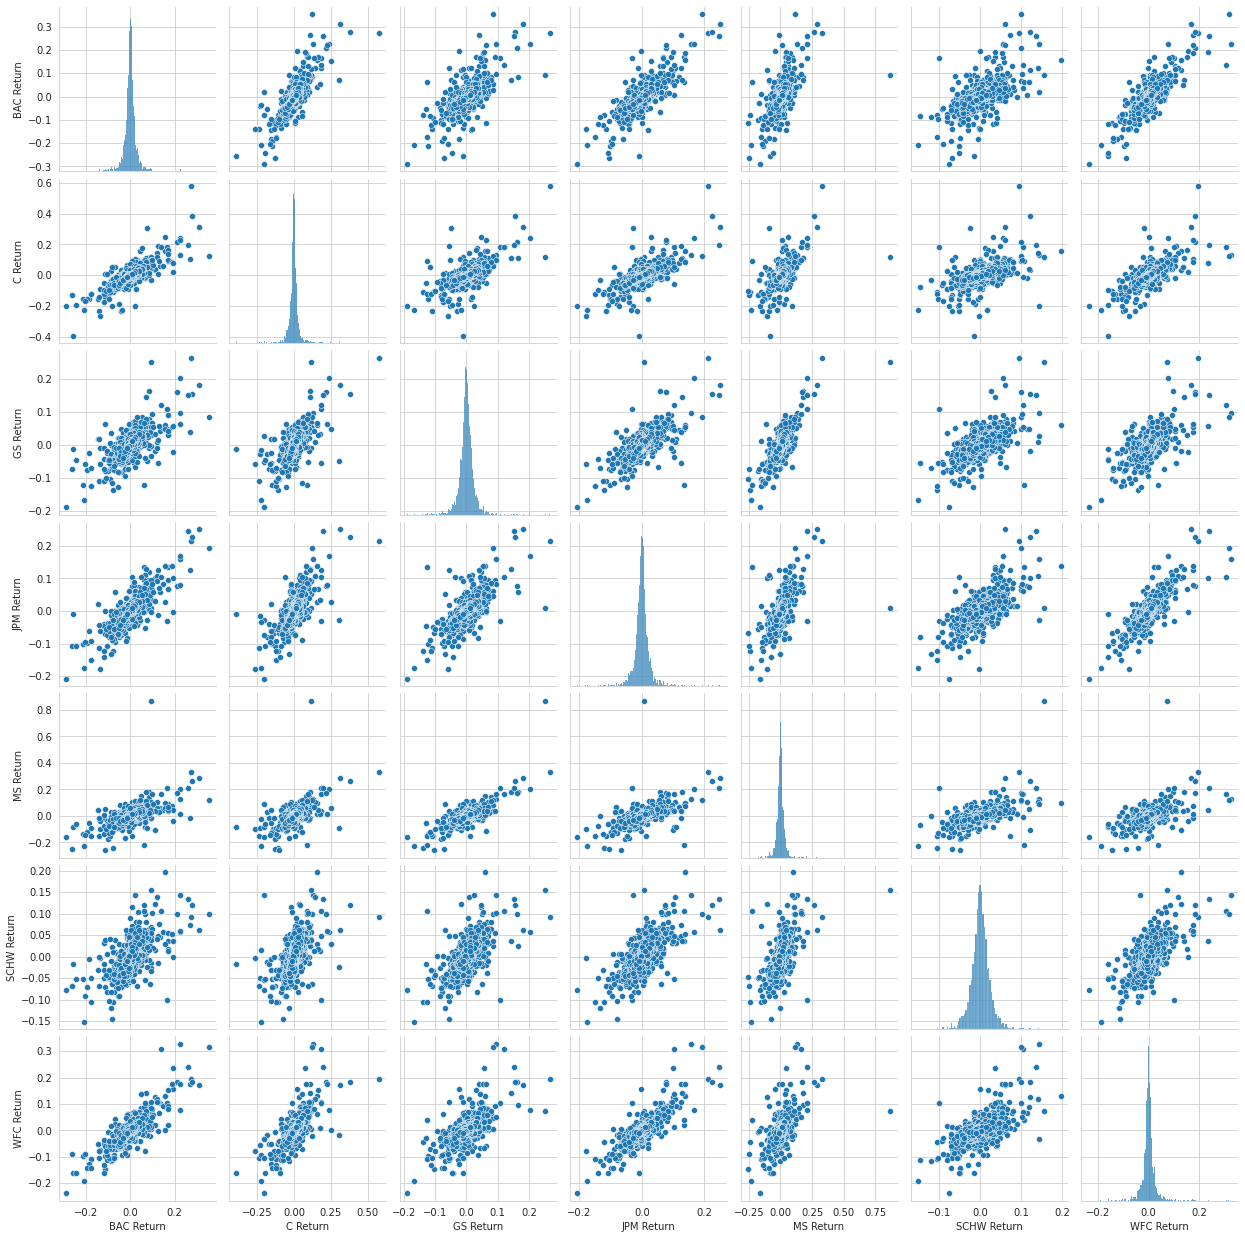

In [13]:
#returns[1:]
sns.pairplot(returns[1:])

Background on [Citigroup's Stock Crash available here.](https://en.wikipedia.org/wiki/Citigroup#November_2008.2C_Collapse_.26_US_Government_Intervention_.28part_of_the_Global_Financial_Crisis.29) 

You'll also see the enormous crash in value if you take a look at the stock price plot (which we do later in the visualizations.)

Using this returns DataFrame, Let's figure out on what dates each bank stock had the best and worst single day returns.

In [14]:
# Worst Drop
returns.idxmin()

BAC Return    2009-01-20
C Return      2009-02-27
GS Return     2009-01-20
JPM Return    2009-01-20
MS Return     2008-10-09
SCHW Return   2008-12-01
WFC Return    2009-01-20
dtype: datetime64[ns]

 You should notice that 4 of the banks [BAC, GS, JPM and WFC] share the same day for the worst drop. The reason might have been the political change (United States Inauguration Day 2009).
 for more details check out this [Article](https://money.cnn.com/2009/01/20/news/companies/banks_stocks/index.htm?postversion=2009012016).

In [15]:
# Best Single Day Gain
# citigroup stock split in May 2011, but also JPM day after inauguration.
returns.idxmax()

BAC Return    2009-04-09
C Return      2008-11-24
GS Return     2008-11-24
JPM Return    2009-01-21
MS Return     2008-10-13
SCHW Return   2008-09-30
WFC Return    2008-07-16
dtype: datetime64[ns]

Let's take a look at the standard deviation of the returns, on which stock would be classified as the riskiest over the entire time period. And which would be classified as the riskiest for the year 2015.

** If the stock has a large standard deviation means the stock is moving up and down a lot, if stock has small standard deviation which means the price is steady.**

In [16]:
returns.std() # Citigroup riskiest

BAC Return     0.036647
C Return       0.038672
GS Return      0.025390
JPM Return     0.027667
MS Return      0.037819
SCHW Return    0.024992
WFC Return     0.030238
dtype: float64

In [17]:
returns.loc['2015-01-01':'2015-12-31'].std() # Very similar risk profiles, but Charles Schwab.

BAC Return     0.016163
C Return       0.015289
GS Return      0.014046
JPM Return     0.014017
MS Return      0.016249
SCHW Return    0.018623
WFC Return     0.012591
dtype: float64

** Creating a distplot for the 2015 returns for Morgan Stanley **

<AxesSubplot:xlabel='MS Return', ylabel='Density'>

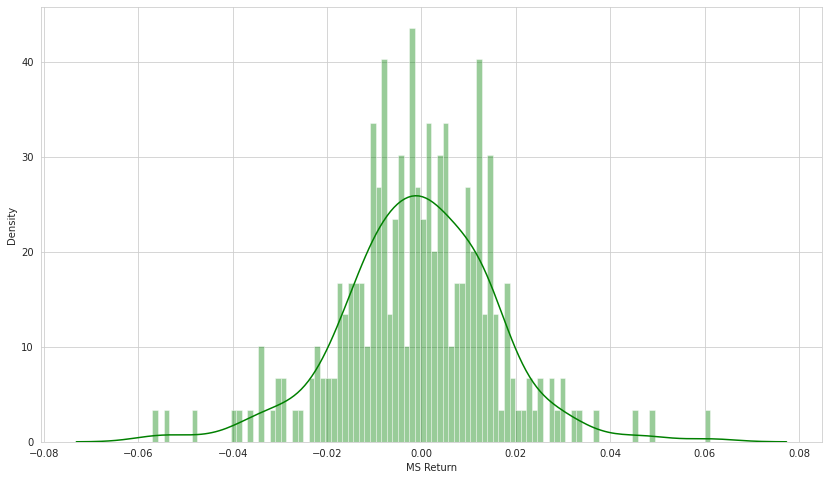

In [18]:
plt.figure(figsize=(14,8))
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=100)

** Creating a distplot using seaborn for the 2008 returns for CitiGroup **

<AxesSubplot:xlabel='C Return', ylabel='Density'>

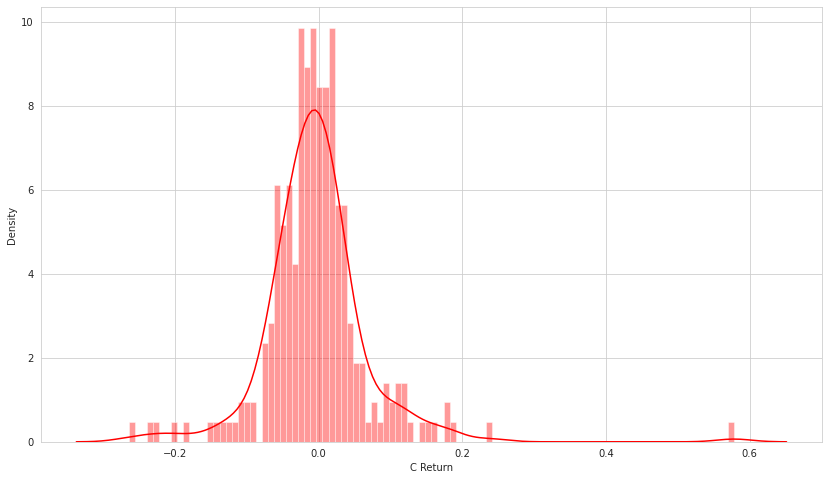

In [19]:
plt.figure(figsize=(14,8))

sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'],color='red',bins=100)

** Creating a line plot showing Close price for each bank for the entire index of time.**

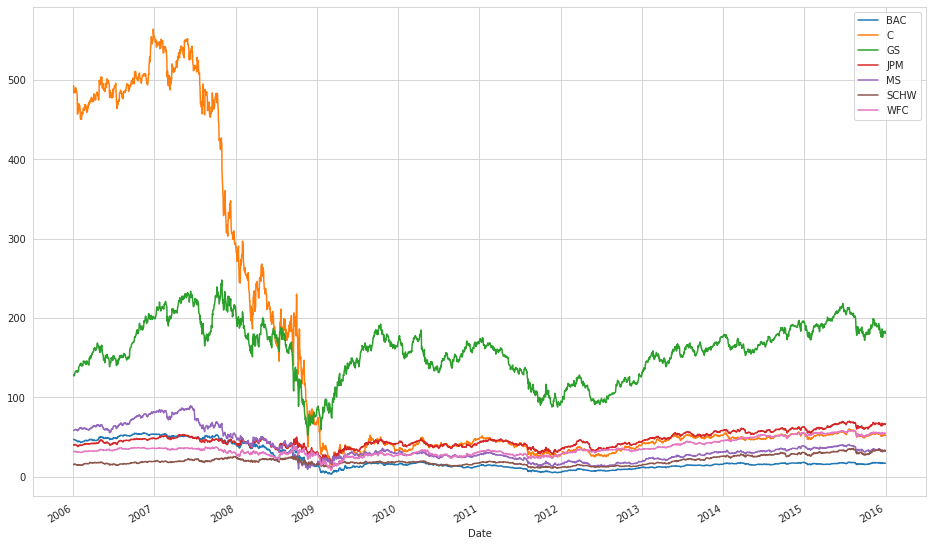

In [20]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(16, 10),label=tick)
plt.legend()

In [21]:
# plotly for interactive viz
close_plt = bank_stocks.xs(key='Close',axis=1,level='Stock Info')

px.line(close_plt)

## Moving Averages

Analyzing the moving averages for these stocks in the year 2008. 

** let's plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

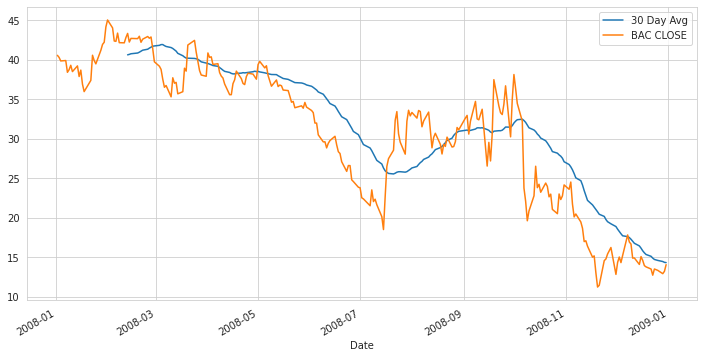

In [22]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

** Here is a heatmap of the correlation between the stocks Close Price.**

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

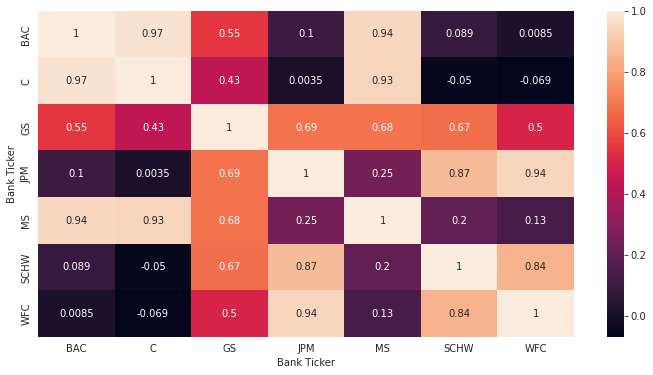

In [23]:
plt.figure(figsize= (12, 6))
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [26]:
# using Plotly
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
fig = px.imshow(close_corr, text_auto=True, aspect="auto")
fig.show()

In [25]:
close_corr

Bank Ticker,BAC,C,GS,JPM,MS,SCHW,WFC
Bank Ticker,,,,,,,
BAC,1.000000,0.971516,0.550898,0.103874,0.944218,0.088933,0.008542
C,0.971516,1.000000,0.434123,0.003515,0.933609,-0.050196,-0.068536
GS,0.550898,0.434123,1.000000,0.685286,0.683792,0.671440,0.499897
JPM,0.103874,0.003515,0.685286,1.000000,0.250427,0.868394,0.940269
MS,0.944218,0.933609,0.683792,0.250427,1.000000,0.202384,0.131835
SCHW,0.088933,-0.050196,0.671440,0.868394,0.202384,1.000000,0.841904
WFC,0.008542,-0.068536,0.499897,0.940269,0.131835,0.841904,1.000000
